There are two sports team A and B. A match is played best 4 of 7 games (or 4/7 or 5/9). The probability that A wons a game is p1. Suppose the playing follows a markov chain process, P(A wins game k|A wins game k-1)=p11, P(A lost game k|A wins game k-1)=p01, how to simulate the probability that the 7th game is played? and how to construct the CI for that estimation. 

In [77]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
def bernoulli(p):
    return 1 if random.random() < p else -1
def sim(p1, p01, p11):
    result = [bernoulli(p1)]
    while result.count(1) < 4 and result.count(-1) < 4:
        if result[-1] == 1:
            result.append(bernoulli(p11))
        else:
            result.append(bernoulli(p01))
    return result
def pGameSeven(N, p1, p01, p11):
    res = [0]*N
    for i in range(N):
        trial_res = sim(p1, p01, p11)
        if len(trial_res)==7:
            res[i] = 1
    return res

In [62]:
# get a point estimate
total_runs = 10000
res = pGameSeven(10000,0.5,0.4,0.55)
prob_full_game = sum(res)*1.0/len(res)

In [63]:
prob_full_game

0.2644

In [73]:
# use bootstrap to build CI
sample_means = []
for i in range(total_runs):
    sample = np.random.choice(res, total_runs-1)
    sample_mean = sum(sample)*1.0/(total_runs-1)
    sample_means.append(sample_mean)

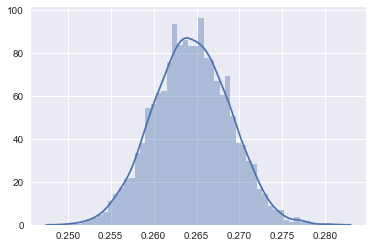

In [78]:
sns.distplot(sample_means)

In [84]:
# 1. direct use quantile
# For example, if we were interested in a confidence interval of 95%, 
# then alpha would be 0.95 and we would select the value at the 2.5% percentile as the lower bound 
# and the 97.5% percentile as the upper bound on the statistic of interest.
alpha = 0.95
ordered = sorted(sample_means)
lower = np.percentile(ordered, (1-alpha)*100.0/2)
upper = np.percentile(ordered, alpha*100+((1-alpha)*100.0/2))
print(lower,upper)

(0.2557255725572557, 0.27302730273027304)


In [87]:
# 2. using std
# according to central limit theorem, the sample mean should follow gaussian distribution. 
# and the 95% confidence CI for sample_mean is mean(t)+/-1.96*se (10000 sample sizes, treat as std known, using z*)
# se here is the std of sample mean distribution, the std of a estimator
se = np.std(sample_means) 
# or se = np.std(res)/np.sqrt(total_runs)
mean_value = np.mean(sample_means)
lower = mean_value - 1.96*se
upper = mean_value + 1.96*se
print(lower, upper)

(0.25572742560156447, 0.27310989813080888)
